In [4]:
import uproot
import uproot_methods.classes.TLorentzVector as LVepm
import matplotlib.pyplot as plt
import time
import infofile
import numpy as np
import mplhep as hep
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import poisson
from scipy.stats import norm

In [41]:
nsteps=100
ntoys=10000

x_min = -5.0
x_max = 5.0

x = np.linspace(x_min, x_max, nsteps)
y = norm.pdf(x, 0, 1.0)

max_y = np.max(y)

print(max_y)

pass_fail = np.array([])

uniform_toys = np.random.uniform(x_min, x_max, size=ntoys)

for itoy in range(0, ntoys):
    toy = uniform_toys[itoy]
    # keep or drop?
    test_toy = np.random.uniform(0, max_y, size=1)
    if (test_toy > norm.pdf(toy, 0, 1.0) ):
        #drop!
        pass_fail = np.append(pass_fail,0)
    else:
        #keep
        pass_fail = np.append(pass_fail, 1)

output_array = uniform_toys[pass_fail>0]


0.39843380169134646


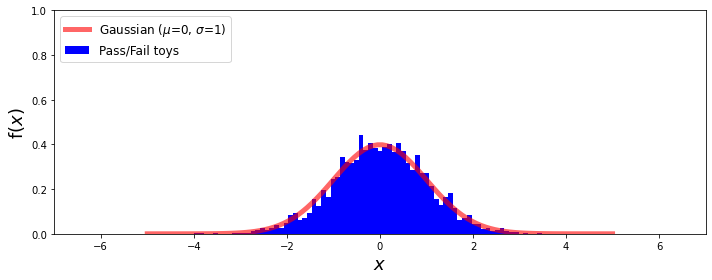

In [42]:
#toys = np.random.normal(size=nEvents)
df = pd.DataFrame(output_array, columns=['toys'])
dataCounts, dataBins = np.histogram(df, bins=x, density=True)
binCentres = (dataBins[:-1] + dataBins[1:]) / 2
width = np.diff(dataBins)

#plt.figure()
fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True)

ax = plt.gca()
labely = ax.set_xlabel("$x$", fontsize = 18)
labely = ax.set_ylabel("f($x$)", fontsize = 18)

x = np.linspace(-5.0, 5.0, 100)
ax.plot(x, norm.pdf(x, 0, 1.0), 'r-', lw=5, alpha=0.6, label=r'Gaussian ($\mu$=0, $\sigma$=1)')
plt.bar(binCentres, dataCounts, align='center', width=width, label='Pass/Fail toys', color='b')

plt.xlim(-7, 7)
plt.ylim(0, 1)

legend = ax.legend(loc='upper left', fontsize='large', ncol=1)

plt.show() 
plt.close()